In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_8_descriptive = get_prompt("descriptive", 8)
prompt_8_natural = get_prompt("natural", 8)

prompt_8_descriptive, prompt_8_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area). 8. Simulate for 1ps at 400K. You do not need to do any analysis of the 400K simulation.',
 'Simulate 1LYZ for 1ps at 300 K and for 1ps at 400K. Report the secondary structure assignments of the downloaded PDB structure and any known binding or active sites. Compute the RMSD, SASA, and radius of gyration of the 300K simulation.')

In [3]:
llm_model = "claude-3-5-sonnet-20241022"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_8_descriptive)

Thought: I'll help solve this step by step. Let's start by downloading the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: I'll continue with analyzing the secondary structure of 1LYZ and finding binding/active sites. Let's use ComputeDSSP for secondary structure analysis.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_202115",
        "top_file": "1LYZ_202115",
        "target_frames": "first"
    }
}
```

Thought: Let's continue by checking for binding and active sites. We'll need the UniProt ID first to get this information.

Action:
```
{
    "action": "MapProteinRepresentation",
    "action_input": {
        "query": "1LYZ",
        "src_db": "PDB",
        "dst_db": "UniProtKB"
    }
}
```

Let me help you with this step by step. Let's start with downloading the PDB file and analyzing its structure.

Action:
```json
{
    "action": "PDBFileDo

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_202115: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_202115
 rec0_202118: dssp values for trajectory with id: 1LYZ_202115
 1LYZ_202147: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_202147
 rec0_202209: dssp values for trajectory with id: 1LYZ_202147
 1LYZ_202324: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_202351: Initial positions for simulation sim0_202351
 sim0_202351: Basic Simulation of Protein 1LYZ_202324
 rec0_202354: Simulation trajectory for protein 1LYZ_202324 and simulation sim0_202351
 rec1_202354: Simulation state log for protein 1LYZ_202324 and simulation sim0_202351
 rec2_202354: Simulation pdb frames for protein 1LYZ_202324 and simulation sim0_202351
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_203004: RMSD plot for 1LYZ
 rgy_rec0_202354: Radii of gyration per frame for rec0_202354
 fig0_203026: Plot of radii of gy

In [9]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_202147"))

In [10]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_202147", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [11]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="P00698")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}, {'start': 70, 'start_modifier': 'EXACT', 'end': 70, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}]\nBinding Sites: [{'start': 119, 'start_modifier': 'EXACT', 'end': 119, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}]\nNo other relevant sites."

In [12]:
# make sure trajectory and topology exist (sim1)
traj_path_1_1 = registry_1.get_mapped_path("rec0_202354")
top_path_1_1 = registry_1.get_mapped_path("top_sim0_202351")

assert os.path.exists(traj_path_1_1)
assert os.path.exists(top_path_1_1)

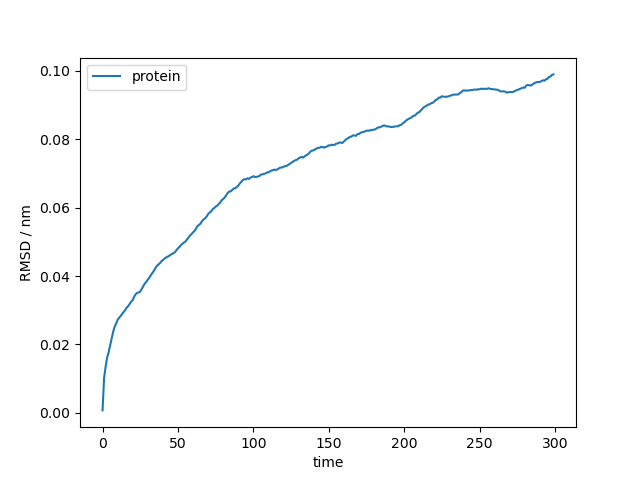

In [13]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_203004'))

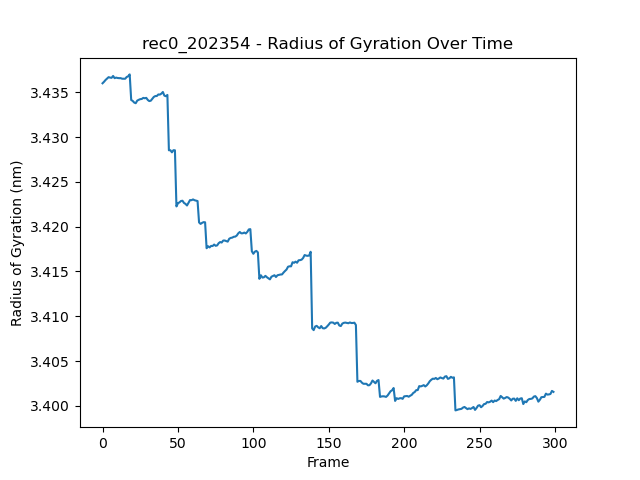

In [14]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_203026'))

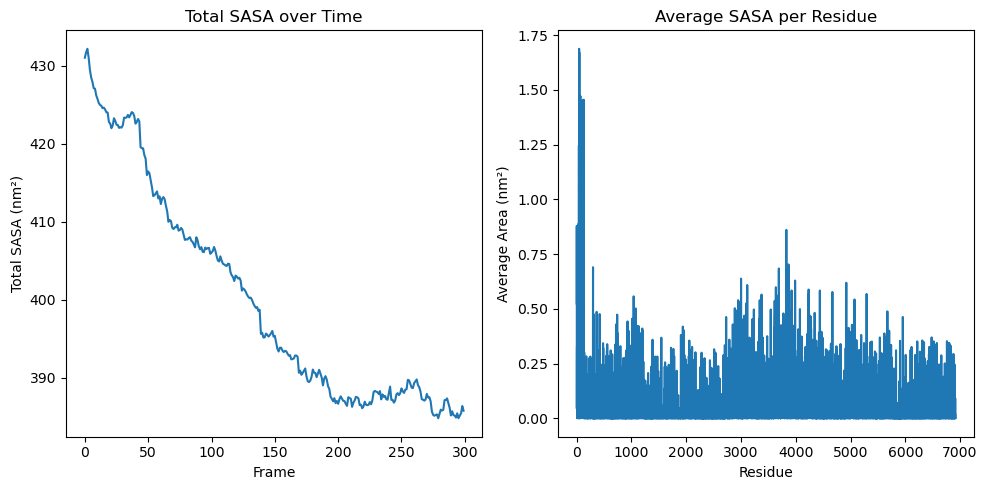

In [15]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_204026'))

In [16]:
# make sure trajectory and topology exist (sim2)
traj_path_1_2 = registry_1.get_mapped_path("rec0_204055")
top_path_1_2 = registry_1.get_mapped_path("top_sim0_204051")

assert os.path.exists(traj_path_1_2)
assert os.path.exists(top_path_1_2)

In [17]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_8_natural)

Thought: I'll break this down into steps:
1. First, download the 1LYZ structure
2. Get binding and active sites information
3. Set up and run simulations at both temperatures
4. Analyze the secondary structure
5. Compute the requested analyses for the 300K simulation

Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that we have the PDB file, let's get information about binding and active sites before proceeding with the simulations.

Action:
```
{
    "action": "GetUniprotID",
    "action_input": "1LYZ"
}
```

Thought: Now that we have the UniProt ID, let's get the binding and active sites information using this ID.

Action:
```
{
    "action": "GetAllKnownSites",
    "action_input": {
        "query": "P17897",
        "primary_accession": "P17897"
    }
}
```

Thought: Now that we have the binding site information, let's analyze the secondary structure of the do

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [18]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_205616: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_205616
 rec0_205626: dssp values for trajectory with id: 1LYZ_205616
 1LYZ_205636: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_205641: Initial positions for simulation sim0_205641
 sim0_205641: Basic Simulation of Protein 1LYZ_205636
 rec0_205645: Simulation trajectory for protein 1LYZ_205636 and simulation sim0_205641
 rec1_205645: Simulation state log for protein 1LYZ_205636 and simulation sim0_205641
 rec2_205645: Simulation pdb frames for protein 1LYZ_205636 and simulation sim0_205641
 rmsd_205641: RMSD for 205641
 fig0_210238: RMSD plot for 205641
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_211129: Plot of SASA over time for 1LYZ
 rgy_rec0_205645: Radii of gyration per frame for rec0_205645
 fig0_211133: Plot of radii of gyration over time for rec0_205645
 top_si

In [19]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_205616"))

In [20]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_205616", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [21]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="P17897")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [22]:
# make sure trajectory and topology exist (sim1)
traj_path_2_1 = registry_2.get_mapped_path("rec0_205645")
top_path_2_1 = registry_2.get_mapped_path("top_sim0_205641")

assert os.path.exists(traj_path_2_1)
assert os.path.exists(top_path_2_1)

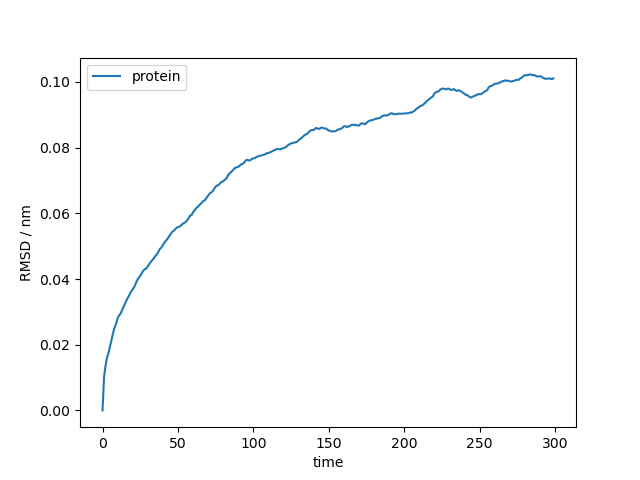

In [27]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_210238'))

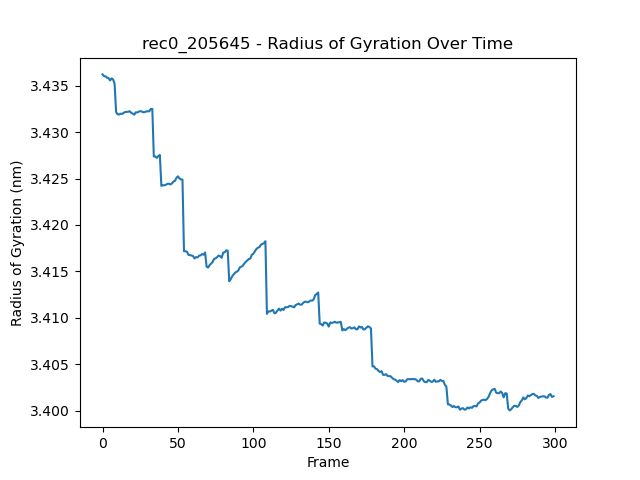

In [26]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_211133'))

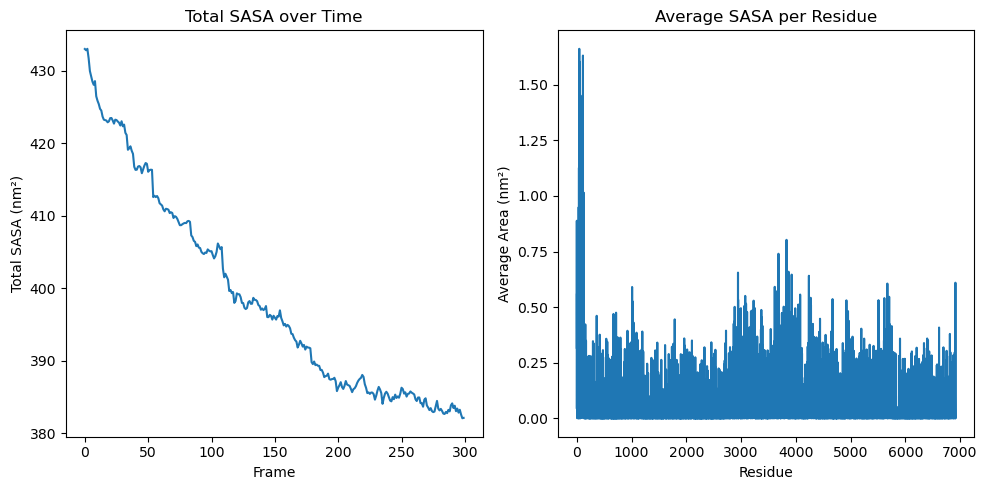

In [28]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_211129'))

In [23]:
# make sure trajectory and topology exist (sim1)
traj_path_2_2 = registry_2.get_mapped_path("rec0_211142")
top_path_2_2 = registry_2.get_mapped_path("top_sim0_211138")

assert os.path.exists(traj_path_2_2)
assert os.path.exists(top_path_2_2)